In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
from scipy.stats import beta as sp_beta
from collections import Counter
from math import factorial

import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = 20, 13
plt.rcParams['font.size'] = 20
plt.rcParams['lines.linewidth'] = 2
import seaborn as sns

import sys
sys.path.insert(0, '../../..')
import assignment
import leximin_assignment
import matrix_gen
import kde_utils

from tqdm import tqdm

import warnings

In [7]:
df = pd.read_csv('../../../data/data.csv', index_col=0)
types = ['ES', 'TH', 'RRH', 'PREV']
df = df[df['Real'] != 2]
df = df.drop(labels='PSH', axis=1)

data = df[types].to_numpy().flatten()
kde = kde_utils.KDEHelper(np.log(data) - np.log(1 - data))

In [8]:
N = 100
N_INTVS = 5
N_EXPERIMENTS = 500
ORDER_MODE_LEVELS = [10, 20, 30, 40, 60, 80, 100]

CAPACITIES = np.ones((N_INTVS,), dtype=int) * (N // N_INTVS)

matrix_generator = matrix_gen.MatrixGenerator(
    kde.sample_and_transform, (lambda x: 1 / (1 + np.exp(-x)), None),
    N, N_INTVS
)

In [15]:
change_order_pof_df = pd.DataFrame(columns=['PoF', 'Order proportion'])

for level in ORDER_MODE_LEVELS:
    print(level)
    
    success_count = 0
    while success_count < N_EXPERIMENTS:
        (matrix, sorted_matrix), (increase_matrix, sorted_increase_matrix) = matrix_generator.partially_sorted_matrix_pair(
            n_rows_to_sort=level
        )
        
        
        ### Leximin
        lex_costs = []
        
        # Original matrix
        lex_assigner = leximin_assignment.LeximinAssignmentHelperV3(
            increase_matrix * 1000, CAPACITIES
        )
        with warnings.catch_warnings():
            warnings.simplefilter('ignore')
            lex_assignments = lex_assigner.solve()
        
        ### Code-breaking error - skip if encounter for now
        if lex_assignments is False:
            # print('Other')
            continue
        
        lex_cost = lex_assigner.get_cost(
            lex_assignments, cost_matrix=matrix
        )
        lex_costs.append(lex_cost)
        
        # Row-sorted matrix
        lex_assigner = leximin_assignment.LeximinAssignmentHelperV3(
            sorted_increase_matrix * 1000, CAPACITIES
        )
        with warnings.catch_warnings():
            warnings.simplefilter('ignore')
            lex_assignments = lex_assigner.solve()
            
        ### Code-breaking error - skip if encounter for now
        if lex_assignments is False:
            # print('Other')
            continue
             
        lex_cost = lex_assigner.get_cost(
            lex_assignments, cost_matrix=sorted_matrix
        )
        lex_costs.append(lex_cost)
        
        
        
        ### Efficient
        eff_costs = []
        
        # Original matrix
        eff_assigner = assignment.AssignmentHelperV2(
            increase_matrix, CAPACITIES
        )
        eff_assignments = eff_assigner.ip_solve()
        eff_cost = eff_assigner.get_cost(
            eff_assignments, cost_matrix=matrix
        )
        eff_costs.append(eff_cost)
        
        # Row-sorted matrix
        eff_assigner = assignment.AssignmentHelperV2(
            sorted_increase_matrix, CAPACITIES
        )
        eff_assignments = eff_assigner.ip_solve()
        eff_cost = eff_assigner.get_cost(
            eff_assignments, cost_matrix=sorted_matrix
        )
        eff_costs.append(eff_cost)
        
        
        # Update statistics
        orders = [np.array2string(order) for order in np.argsort(matrix, axis=1)]
        sorted_orders = [np.array2string(order) for order in np.argsort(sorted_matrix, axis=1)]
        # true_level = Counter(orders).most_common(1)[0][1]
        
        change_order_pof_df.loc[change_order_pof_df.shape[0]] = [
            lex_costs[0] / eff_costs[0],
            Counter(orders).most_common(1)[0][1]
        ]
        change_order_pof_df.loc[change_order_pof_df.shape[0]] = [
            lex_costs[1] / eff_costs[1],
            Counter(sorted_orders).most_common(1)[0][1]
        ]
        success_count += 1
        print(level, success_count)

10
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
10 12
10 13
10 14
10 15
10 16
10 17
10 18
10 19
10 20
10 21
10 22
10 23
10 24
10 25
10 26
10 27
10 28
10 29
10 30
10 31
10 32
10 33
10 34
10 35
10 36
10 37
10 38
10 39
10 40
10 41
10 42
10 43
10 44
10 45
10 46
10 47
10 48
10 49
10 50
10 51
10 52
10 53
10 54
10 55
10 56
10 57
10 58
10 59
10 60
10 61
10 62
10 63
10 64
10 65
10 66
10 67
10 68
10 69
10 70
10 71
10 72
10 73
10 74
10 75
10 76
10 77
10 78
10 79
10 80
10 81
10 82
10 83
10 84
10 85
10 86
10 87
10 88
10 89
10 90
10 91
10 92
10 93
10 94
10 95
10 96
10 97
10 98
10 99
10 100
10 101
10 102
10 103
10 104
10 105
10 106
10 107
10 108
10 109
10 110
10 111
10 112
10 113
10 114
10 115
10 116
10 117
10 118
10 119
10 120
10 121
10 122
10 123
10 124
10 125
10 126
10 127
10 128
10 129
10 130
10 131
10 132
10 133
10 134
10 135
10 136
10 137
10 138
10 139
10 140
10 141
10 142
10 143
10 144
10 145
10 146
10 147
10 148
10 149
10 150
10 151
10 152
10 153
10 154
10 155
10 156
10 157
10 158

30 217
30 218
30 219
30 220
30 221
30 222
30 223
30 224
30 225
30 226
30 227
30 228
30 229
30 230
30 231
30 232
30 233
30 234
30 235
30 236
30 237
30 238
30 239
30 240
30 241
30 242
30 243
30 244
30 245
30 246
30 247
30 248
30 249
30 250
30 251
30 252
30 253
30 254
30 255
30 256
30 257
30 258
30 259
30 260
30 261
30 262
30 263
30 264
30 265
30 266
30 267
30 268
30 269
30 270
30 271
30 272
30 273
30 274
30 275
30 276
30 277
30 278
30 279
30 280
30 281
30 282
30 283
30 284
30 285
30 286
30 287
30 288
30 289
30 290
30 291
30 292
30 293
30 294
30 295
30 296
30 297
30 298
30 299
30 300
30 301
30 302
30 303
30 304
30 305
30 306
30 307
30 308
30 309
30 310
30 311
30 312
30 313
30 314
30 315
30 316
30 317
30 318
30 319
30 320
30 321
30 322
30 323
30 324
30 325
30 326
30 327
30 328
30 329
30 330
30 331
30 332
30 333
30 334
30 335
30 336
30 337
30 338
30 339
30 340
30 341
30 342
30 343
30 344
30 345
30 346
30 347
30 348
30 349
30 350
30 351
30 352
30 353
30 354
30 355
30 356
30 357
30 358
30 359

60 418
60 419
60 420
60 421
60 422
60 423
60 424
60 425
60 426
60 427
60 428
60 429
60 430
60 431
60 432
60 433
60 434
60 435
60 436
60 437
60 438
60 439
60 440
60 441
60 442
60 443
60 444
60 445
60 446
60 447
60 448
60 449
60 450
60 451
60 452
60 453
60 454
60 455
60 456
60 457
60 458
60 459
60 460
60 461
60 462
60 463
60 464
60 465
60 466
60 467
60 468
60 469
60 470
60 471
60 472
60 473
60 474
60 475
60 476
60 477
60 478
60 479
60 480
60 481
60 482
60 483
60 484
60 485
60 486
60 487
60 488
60 489
60 490
60 491
60 492
60 493
60 494
60 495
60 496
60 497
60 498
60 499
60 500
80
80 1
80 2
80 3
80 4
80 5
80 6
80 7
80 8
80 9
80 10
80 11
80 12
80 13
80 14
80 15
80 16
80 17
80 18
80 19
80 20
80 21
80 22
80 23
80 24
80 25
80 26
80 27
80 28
80 29
80 30
80 31
80 32
80 33
80 34
80 35
80 36
80 37
80 38
80 39
80 40
80 41
80 42
80 43
80 44
80 45
80 46
80 47
80 48
80 49
80 50
80 51
80 52
80 53
80 54
80 55
80 56
80 57
80 58
80 59
80 60
80 61
80 62
80 63
80 64
80 65
80 66
80 67
80 68
80 69
80 70
80 71

# Uniform costs

In [13]:
# change_order_pof_df.to_csv('change_order_uniform_pof_df.csv', index=False)

10
10 1
10 2
10 3


IndexError: index 68 is out of bounds for axis 1 with size 5

In [2]:
change_order_pof_df = pd.read_csv('change_order_uniform_pof_df.csv')

In [3]:
change_order_pof_df

,PoF,Order proportion
0,1.000000,4.0
1,1.008933,10.0
2,1.003983,4.0
3,1.000806,11.0
4,1.000939,4.0
...,...,...
6995,1.033009,100.0
6996,1.008966,4.0
6997,1.068084,100.0
6998,1.000000,3.0


In [4]:
def get_range_str(number):
    for i, level in enumerate(ORDER_MODE_LEVELS):
        if number < level:
            if i == 0:
                return f'1 - {level}'
            return f'{ORDER_MODE_LEVELS[i - 1]} - {level}'
        
    return 'All sorted'

In [9]:
change_order_pof_df['Range'] = change_order_pof_df['Order proportion'].apply(get_range_str)
change_order_pof_df

,PoF,Order proportion,Range
0,1.000000,4.0,1 - 10
1,1.008933,10.0,10 - 20
2,1.003983,4.0,1 - 10
3,1.000806,11.0,10 - 20
4,1.000939,4.0,1 - 10
...,...,...,...
6995,1.033009,100.0,All sorted
6996,1.008966,4.0,1 - 10
6997,1.068084,100.0,All sorted
6998,1.000000,3.0,1 - 10


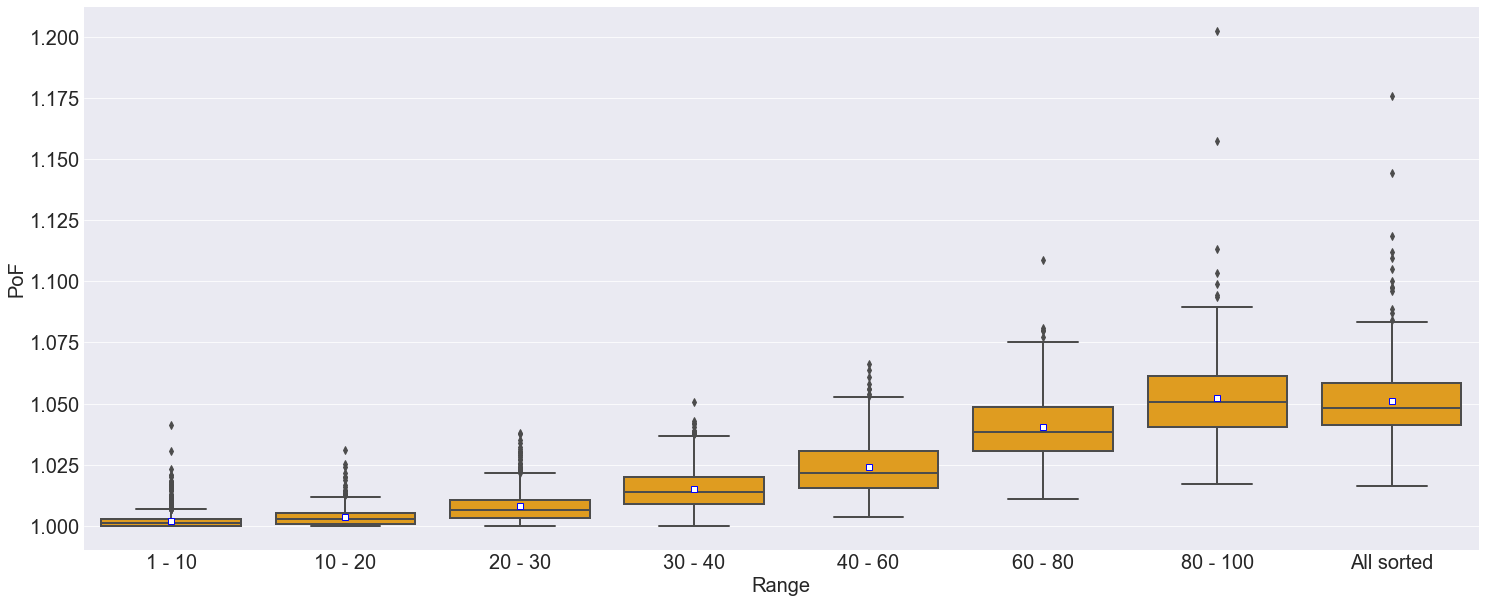

In [10]:
plt.figure(figsize=(25, 10))

sns.boxplot(
    x='Range', y='PoF', data=change_order_pof_df, color='orange',
    showmeans=True, meanprops={"marker": "s","markerfacecolor": "white", "markeredgecolor": "blue"}
)
plt.show()

In [13]:
change_order_pof_df['Range'].value_counts()

1 - 10        3500
20 - 30        500
30 - 40        500
80 - 100       500
60 - 80        500
10 - 20        500
All sorted     500
40 - 60        500
Name: Range, dtype: int64

# KDE costs

In [14]:
# change_order_pof_df.to_csv('change_order_kde_pof_df.csv', index=False)

In [18]:
change_order_pof_df = pd.read_csv('change_order_kde_pof_df.csv')

In [19]:
change_order_pof_df

,PoF,Order proportion
0,1.000662,5.0
1,1.000877,10.0
2,1.000089,4.0
3,1.000000,12.0
4,1.000000,4.0
...,...,...
6995,1.020349,100.0
6996,1.001416,6.0
6997,1.036701,100.0
6998,1.000000,4.0


In [20]:
change_order_pof_df['Range'] = change_order_pof_df['Order proportion'].apply(get_range_str)
change_order_pof_df

,PoF,Order proportion,Range
0,1.000662,5.0,1 - 10
1,1.000877,10.0,10 - 20
2,1.000089,4.0,1 - 10
3,1.000000,12.0,10 - 20
4,1.000000,4.0,1 - 10
...,...,...,...
6995,1.020349,100.0,All sorted
6996,1.001416,6.0,1 - 10
6997,1.036701,100.0,All sorted
6998,1.000000,4.0,1 - 10


In [22]:
change_order_pof_df['Range'].value_counts()

1 - 10        3500
20 - 30        500
30 - 40        500
80 - 100       500
60 - 80        500
10 - 20        500
All sorted     500
40 - 60        500
Name: Range, dtype: int64

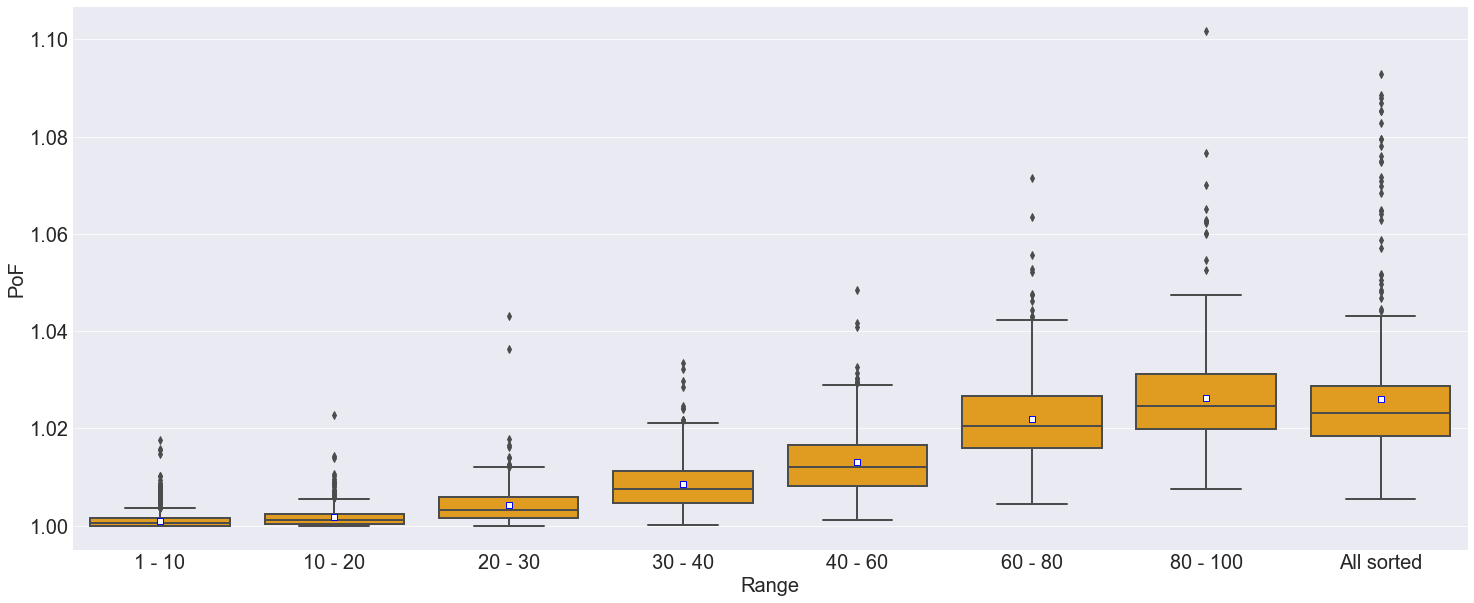

In [21]:
plt.figure(figsize=(25, 10))

sns.boxplot(
    x='Range', y='PoF', data=change_order_pof_df, color='orange',
    showmeans=True, meanprops={"marker": "s","markerfacecolor": "white", "markeredgecolor": "blue"}
)
plt.show()